# Inaugural Project

Imports and set magics:

In [5]:
import numpy as np
import matplotlib.pylab as plt
from scipy import optimize
# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [6]:
# code for solving the model (remember documentation and comments) This is fine
# Using condition (2) on equation(1) we define the utility function of the consumer:
def utility(w, l, m = 1, v = 10, epsilon = 0.3, tau0 = 0.4, tau1 = 0.1, kappa = 0.4):
    tax = tau0*w*l+tau1*np.fmax(w*l-kappa,0)
    c = m+w*l-tax
    utility = np.log(c)-v*l**(1+1/epsilon)/(1+1/epsilon)
    return utility,c, tax

In [7]:
# Then we create a function to maximize the utility for given parameters:
def solveconsumerproblem(w, m = 1, v = 10, epsilon = 0.3, tau0 = 0.4, tau1 = 0.1, kappa = 0.4, N=100,
                         callableoutput=False, tax=False):

    "Solves the consumerproblem for given parameters. If callableoutput is True the output is a tuple   with callable values, else the output is a neatly formatted string. If Tax is true, the consumers tax payment will be included in the output."

# We start by creating empty lists to store the output in.
    c_star = [0]
    l_star = [0]
    t_star = [0]
    utility_star = [-np.inf]
    
    Range = np.linspace(0, 1, N)
    for i in Range:
        utility_temp = utility(l = i, w = w, epsilon = epsilon, tau0 = tau0, tau1 = tau1, kappa = kappa)
        if utility_temp[0]>utility_star:
            utility_star[0]=utility_temp[0]
            l_star[0] = i
            c_star[0] = utility_temp[1]
            t_star[0] = utility_temp[2]

    if tax == False:
        if callableoutput == False:
            print(f"The optimal labour and consumption (l*,C*) = ({l_star[0]:.3}, {c_star[0]:.3}) -> u(C*,l*) = {utility_star[0]:.3}")  
        else:
            return utility_star[0], l_star[0], c_star[0]
    
    if tax == True:
            return utility_star[0], l_star[0], c_star[0], t_star[0]

In [8]:
solveconsumerproblem(w=0.6, tax=False, callableoutput=False)

The optimal labour and consumption (l*,C*) = (0.354, 1.13) -> u(C*,l*) = 0.0943


# Question 2

In [9]:
# We start by generating lists of $l^*$ and $c^*$, containing the optimal values of l and c, for a given w.

w_range = np.linspace(0.5, 1.5, 200) # We define a range of w

# We create the empty lists for the output
l_list = []
c_list = []

# Then we loop through the w_range and save the optimal values of c and l
for i in w_range:
    l_list.append(solveconsumerproblem(w = i, callableoutput=True)[1])
    c_list.append(solveconsumerproblem(w = i, callableoutput=True)[2])

ADD ANSWER.

Text(0, 0.5, 'forbrug')

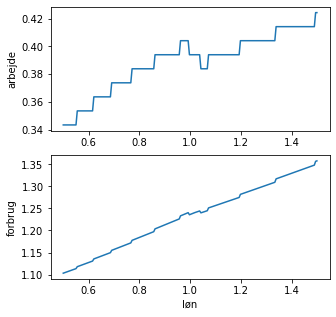

In [10]:
fig = plt.figure(figsize=(5,5))

# sub figure 1
ax = fig.add_subplot(2,1,1)
plt.plot(w_range,l_list)
ax.set_ylabel("arbejde")

# sub figure 2
ax = fig.add_subplot(2,1,2)
ax.plot(w_range, c_list)
ax.set_xlabel('løn')
ax.set_ylabel('forbrug')

# Question 3

ADD ANSWER.

In [31]:
# We start by generating the different wages for the different consumers
wage_list = np.random.uniform(low = 0.5, high = 1.5, size = 100)

In [32]:
def taxrev(wages, tau0, tau1, kappa, epsilon = 0.3):
    "Calculates the total tax revenu for a list of wages and given parameters"

    tax_payments = []

    for i in wages:
       tax_payments.append(solveconsumerproblem(w = i, tau0=tau0, tau1=tau1, epsilon=epsilon, kappa=kappa, callableoutput = True, tax = True)[-1]) 
    return np.sum(tax_payments)

In [37]:
# Then we call the taxrev function
print(taxrev(wages = wage_list, tau0=0.4, tau1=0.1, kappa=0.4, epsilon=0.3))
# Bedste bud på parameter værdier fra size 10 forsøg, den bliver marginalt bedre med højere sze.
print(taxrev(wages = wage_list, tau0=0.7552, tau1=0.04349, kappa=0.0000002871, epsilon=0.3))

16.247955039189204
24.563997526281586


# Question 4

ADD ANSWER.

In [34]:
# Now we run the taxrev function for epsilon=0.1
print(taxrev(wages = wage_list, tau0=0.4, tau1=0.1, kappa=0.4, epsilon=0.1))

31.83293456763969


# Question 5

ADD ANSWER.

In [35]:
def negtaxrev(paraVec, wages = wage_list):
    tau0 = paraVec[0]
    tau1 = paraVec[1]
    kappa = paraVec[2]
    temptaxrev = -1*taxrev(wages = wages, tau0 = tau0, tau1= tau1, kappa=kappa)
    if kappa <= 0:
         return 1
    else:
         return temptaxrev

30


In [36]:
initial_guess = [0.1, 0.1, 0.1]
sol_taxrev = optimize.minimize(negtaxrev, initial_guess, method = 'Powell')
print(sol_taxrev)

direc: array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
     fun: -24.614365599717537
 message: 'Optimization terminated successfully.'
    nfev: 359
     nit: 4
  status: 0
 success: True
       x: array([7.30481159e-01, 5.64131835e-02, 5.63791879e-10])


# Conclusion
print(sol_taxrev)


ADD CONCISE CONLUSION.